<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/Brain_Tumour_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/BrainTumor/Training"
test_dir = "/content/drive/MyDrive/BrainTumor/Testing"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


# Define preprocessing pipelines
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalization
    rotation_range=15,        # Augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


#Load datasets


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 5712 images belonging to 4 classes.
Found 1321 images belonging to 4 classes.


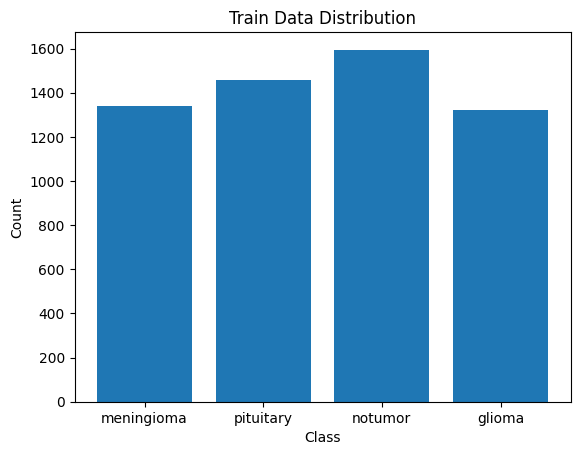

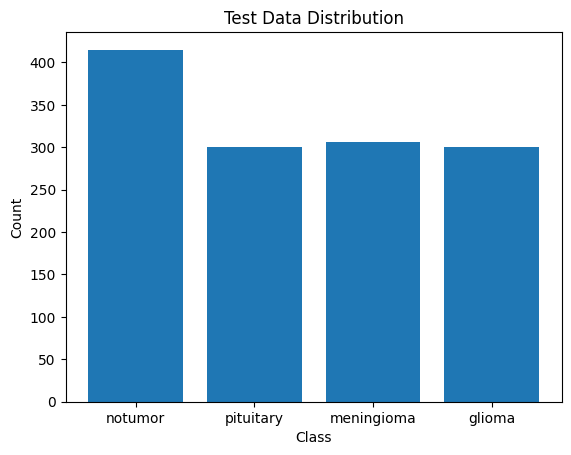

In [2]:
# Class distribution

import os
import matplotlib.pyplot as plt



train_count = {cls:len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
test_count = {cls:len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

plt.bar(train_count.keys(), train_count.values())
plt.title("Train Data Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.bar(test_count.keys(),test_count.values())
plt.title("Test Data Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [3]:
#Show sample training images

class_names= list(train_generator.class_indices.keys())

x_batch, y_batch = next (train_generator)

plt.figure(figsize=(10,6))

for i in range (8):
  plt.subplot(2,4,i+1)
  plt.imshow(x_batch[i])
  plt.title(class_names[y_batch.argmax()])
  plt.axis("off")
  plt.suptitle("Sample Training Images")
  plt.show()


OSError: [Errno 107] Transport endpoint is not connected

In [ ]:
# ------------------------------
# 7. Normalization check (EDA)
# ------------------------------

# Before normalization → pixel values are in [0, 255]
# After normalization → pixel values are in [0, 1]
print("Pixel range after normalization:", x_batch.min(), "to", x_batch.max())

# Plot histogram of pixel intensities for one image
plt.hist(x_batch[0].ravel(), bins=50)
plt.title("Pixel Intensity Distribution (Normalized)")
plt.show()


In [ ]:
# ------------------------------
# 8. Augmentation preview (EDA)
# ------------------------------

# Generate augmented versions of one image batch
augmented_images = train_datagen.flow(x_batch, y_batch, batch_size=1)

plt.figure(figsize=(10,4))
for i in range(4):  # Show 4 augmented samples
    aug_img, _ = next(augmented_images)
    plt.subplot(1,4,i+1)
    plt.imshow(aug_img[0])  # Show augmented image
    plt.axis("off")
plt.suptitle("Augmented Images")
plt.show()




In [ ]:
# ------------------------------
# 9. Feature Visualization using PCA (EDA)
# ------------------------------
from sklearn.decomposition import PCA

# Flatten images into 1D arrays (for PCA input)
X = x_batch.reshape(x_batch.shape[0], -1)

# Apply PCA to reduce features → 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of PCA features
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_batch.argmax(axis=1), cmap="viridis")
plt.title("PCA of Image Features")
plt.colorbar()  # Shows mapping of colors to classes
plt.show()
